# This is a demo on how to use the HET Pupil tool
This tool is to obtain the effective apperture of HET as a function of time during an observation block.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from HETpupil import ObservationBlock

In [2]:
# Creat an Observation block for TRAPPIST-1  aka. '2MASS J23062928-0502285'

TRAPPObservation = ObservationBlock('2MASS J23062928-0502285')

/home/joe/PyNEIDenv/lib/python2.7/site-packages/astropy/time/core.py:676: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif longitude == 'greenwich':


2MASS J23062928-0502285 will cross zenith at 2017-03-17 18:23:18.799157
Calculating optimal Azimuth and transit time..
Optimal Azimuth to park telescope is at: 180.000025146 deg
Star will transit the East track window at 2017-03-17 18:21:22.479143
Duration of Track length = 4023.16013115 seconds
Initialising HET Primary Mirror and Pupil..
Area of one Hex Segment mirror of primary = 0.866025403784 m^2
No of Segments in Primary Mirror = 91
Area of Primary Mirror = 77.0762609368 m^2


<IPython.core.display.Javascript object>


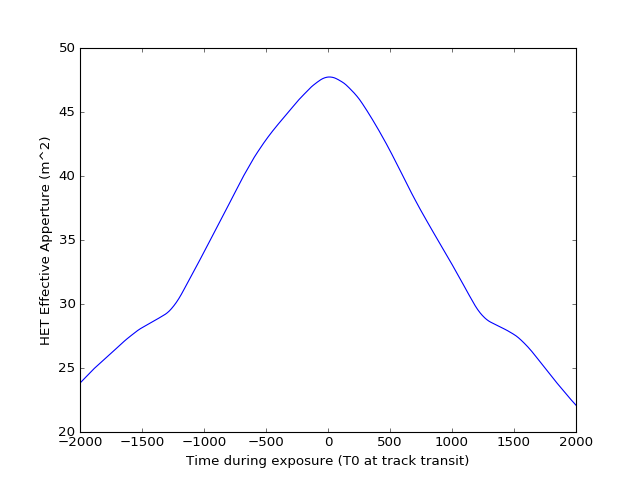

In [4]:
# Plot the telescope aperture during this track
t = np.linspace(-2000,2000,1000)
plt.plot(t,TRAPPObservation.EffectiveHETapperture(t))
plt.ylabel('HET Effective Apperture (m^2)')
plt.xlabel('Time during exposure (T0 at track transit)')
plt.show()